# Support Vector Machines
Support vector machines or `SVM` is a supervised learning algorithm which can be used for classification and regression problems as support vector classification (SVC) and support vector regression (SVR). It is used for `smaller dataset` as it takes too long to process.

* `Hyperplane:`
The hyperplane is a function which is used to differentiate between features. In 2-D, the function used to classify between features is a line whereas, the function used to classify the features in a 3-D is called as a plane similarly the function which classifies the point in higher dimension is called as a hyperplane. SVM is based on the idea of finding a hyperplane that best separates the features into different domains.

<img height=600 width=600 src="images/hyperplane.png" />

We add a third dimension, in cases where we seperate the two vectors using straight lines. Up until now we had two dimensions: x and y. 

We create a new z dimension, and we rule that it be calculated a certain way that is convenient for us: z = x² + y² (you’ll notice that’s the equation for a circle).

[Source: towardsdatascience Blog](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589)

### The kernel trick

Calculating this transformation can get pretty computationally expensive. There can be a lot of new dimensions, each one of them possibly involving a complicated calculation. Doing this for every vector in the dataset can be a lot of work, so it’d be great if we could find a cheaper solution.

SVM doesn’t need the actual vectors to work its magic, it actually can get by only with the `dot products` between them. This means that we can sidestep the expensive calculations of the new dimensions.

z = x² + y²

    Figure out what the dot product in that space looks like:

a · b = xa · xb  +  ya · yb  +  za · zb

a · b = xa · xb  +  ya · yb +  (xa² + ya²) · (xb² + yb²)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# A lambda function is a small anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# converting the number column to names. 2 --> setosa

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
# first 50 rows, 0 --> setosa
df[0:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [8]:
# 50-100 rows, 1 --> versicolor
df[51:53]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


In [9]:
# 100-150 rows, 2 --> viginica
df[100:102]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


**Sepal length vs Sepal Width (Setosa vs Versicolor)**

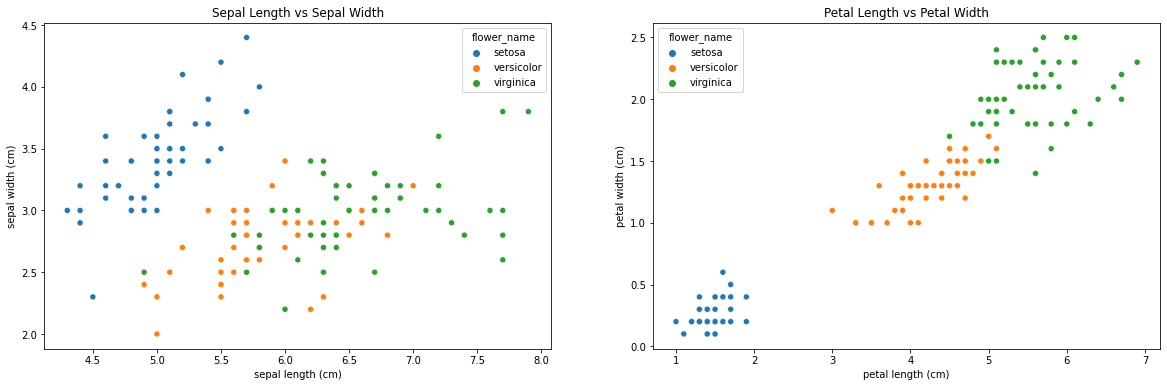

In [10]:
#  seaborn subplotting

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
sns.scatterplot(ax=axs[0], x = "sepal length (cm)", y ="sepal width (cm)", hue='flower_name',data=df)
axs[0].set_title("Sepal Length vs Sepal Width")

sns.scatterplot(ax=axs[1], x = "petal length (cm)", y ="petal width (cm)", hue='flower_name',data=df)
axs[1].set_title("Petal Length vs Petal Width");

In [11]:
# Train using Support vector Classifier (SVC)
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'], axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
len(x_train), len(x_test)

(120, 30)

In [19]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

In [14]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

## Hyper Parameter Tuning

### Regularization

Regularization is a technique that reduces error from a model by avoiding overfitting and training the model to function properly.

`Overfitting` is a common problem. When you overfeed the model with data that does not contain the capacity to handle, it starts acting irregularly. This irregularity will include noise instead of signal in the outcome. Your model will start considering the unnecessary data as the concept. The term used to refer to this is “overfitting”, and it leads to inaccurate outputs— decreasing the accuracy and efficiency of the data.

The main reason why the model is “overfitting” is that it fails to generalize the data because of too much irrelevance. However, regularization is an effective method that improves the accuracy of the model and reduces unnecessary variances. 

#### L1 Regularization

The regression model of this regularization technique is called `Lasso Regression`. The regression model is a penalty term. Lasso is short for the Least Absolute Shrinkage and Selection Operator. Lasso adds the magnitude’s absolute value to the coefficient. These values are penalty terms of the loss function.

#### L2 Regularization

On the other hand, the regression model of L2 regularization is `ridge regression`. In this regularization, the penalty term of the loss function is the squared magnitude of the coefficient. In this method, the value of lambda is zero because adding a large value of lambda will add more weights, causing underfitting.

Choosing Between L1 and L2 Regularization

To choose the regularization technique between L1 and L2, you need to consider the amount of the data. `If the data is larger, you should use L2 regularization`. However, if the data is small, you need to choose the L1 regularization.

#### C

`C` is the `penalty parameter` of the error term. Increasing C values may lead to overfitting the training data.

It controls the trade off between smooth decision boundary and classifying the training points correctly.

In [20]:
model_score = [i for i in range(20)]
penalty_parameter = [i for i in range(20)]
# print(penalty_parameter)

model_C = SVC(C=0.08)
model_C.fit(x_train, y_train)
model_score[0] = model_C.score(x_test, y_test)
model_score[0]

0.8

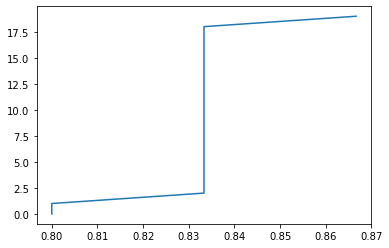

In [26]:
i = 0
j = 0.083
for i in range(20): 
    model_C = SVC(C = j)
    model_C.fit(x_train, y_train)
    model_score[i] = model_C.score(x_test, y_test)
    # print(model_score[i])
    i = i + 1
    j = j + 0.007
    if i > 19:
        break;
plt.plot(model_score, penalty_parameter)

We can see an exponential increase in accuracy of the model as we tweak the c value from c = 0.08 to 0.1 .

### Gamma

The higher Gamma is, the higher the regularization. Default value is 0 (no regularization).

Gamma values around 20 are extremely high, and should be used only when you are using high depth (i.e overfitting blazing fast, not letting the variance/bias tradeoff stabilize for a local optimum) or if you want to control the directly the features which are dominating in the data set (i.e too strong feature engineering).

In [29]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9333333333333333

### Kernel

In [27]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [28]:
model_linear_kernal.score(x_test, y_test)

1.0